# Seed Choice Investigation
Wont implement the heuristic seed, search for an approximation.

In [1]:
from os.path import join
from os import getcwd
import json

from dataset.Dataset import Dataset
from experiments.Analyser import accuracy_based_on_jacard_index
from graph.SpreadSheetGraph import SpreadSheetGraph
from labelregions.LabelRegionLoader import LabelRegionLoader
from search.ExhaustiveSearch import ExhaustiveSearch
from search.FitnessRater import FitnessRater, get_initial_weights

DATA_DIR = join(getcwd(), "../data")
OUTPUT_DIR = join(getcwd(), "output_final/output")

refined_file_path = join(DATA_DIR, "Deco", "refined.json")
with open(refined_file_path) as f:
    refined_data = json.load(f)

relevant_keys = [key for key, value in refined_data.items()] #  if value["edge_count"] > 10]

DECO = Dataset(join(DATA_DIR, "Deco"), "Deco")

loader = LabelRegionLoader()


In [2]:
from tqdm import tqdm

graphs = []
for relevant_key in tqdm(relevant_keys):
    rater = FitnessRater(get_initial_weights())
    sheet_data = DECO.get_specific_sheetdata(relevant_key, loader)
    graph = SpreadSheetGraph(sheet_data)
    graphs.append(graph)

  7%|▋         | 42/622 [00:02<00:25, 22.43it/s]/home/tgarrels/.local/lib/python3.8/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
 36%|███▌      | 222/622 [00:10<00:24, 16.40it/s]/home/tgarrels/.local/lib/python3.8/site-packages/openpyxl/reader/drawings.py:29: UserWarning: DrawingML support is incomplete and limited to charts and images only. Shapes and drawings will be lost.
  warn("DrawingML support is incomplete and limited to charts and images only. Shapes and drawings will be lost.")
 51%|█████     | 315/622 [00:16<00:10, 30.02it/s]/home/tgarrels/.local/lib/python3.8/site-packages/openpyxl/reader/drawings.py:55: UserWarning: The image xl/media/image1.emf will be removed because it cannot be read
  warn(msg)
 91%|█████████▏| 569/622 [00:28<00:02, 25.53it/s]/home/tgarrels/.local/lib/python3.8/site-packages/openpyxl/reader/drawings.py:59: UserWarn

In [3]:
# Collect edges
edges = [edge for graph in graphs for edge in graph.edge_list]
edge_types = list(map(lambda x: x.connection_type, edges))

for edge_type in set(edge_types):
    print(f"{edge_type}: {edge_types.count(edge_type)} / {len(edge_types)}")

ConnectionType.D_H: 3621 / 28179
ConnectionType.D_D: 22188 / 28179
ConnectionType.H_H: 2370 / 28179


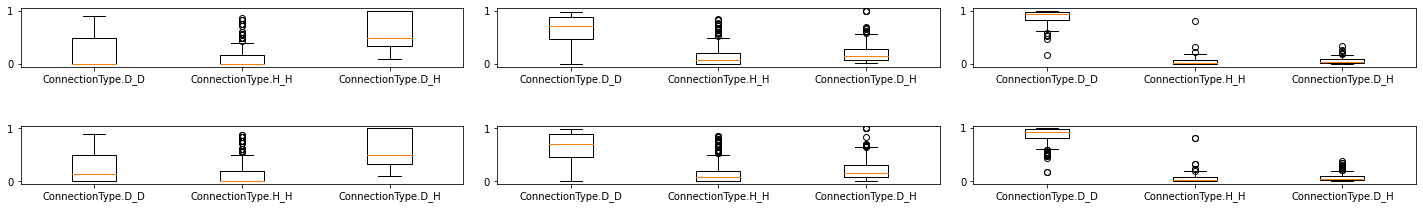

In [29]:
import matplotlib.pyplot as plt
from graph.Edge import ConnectionType

type_percentages = {
    "1_10": {
        ConnectionType.D_D: [],
        ConnectionType.H_H: [],
        ConnectionType.D_H: [],
    },
    "10_100": {
        ConnectionType.D_D: [],
        ConnectionType.H_H: [],
        ConnectionType.D_H: [],
    },
    ">100": {
        ConnectionType.D_D: [],
        ConnectionType.H_H: [],
        ConnectionType.D_H: [],
    },
}
plt.rcParams["figure.figsize"] = (20,3)
fig, axes = plt.subplots(2,3)
for i, only_enabled_edges in enumerate([True, False]):
    for graph in graphs:
        edges = [
            edge
            for i, edge in enumerate(graph.edge_list)
            if not only_enabled_edges or graph.edge_toggle_list[i]
        ]

        edge_count_key = "1_10"
        if 10 < len(edges) <= 100:
            edge_count_key = "10_100"
        if len(edges) > 100:
            edge_count_key = ">100"

        edge_types = list(map(lambda x: x.connection_type, edges))
        edge_counts = list(zip(
            set(type_percentages[edge_count_key].keys()),
            [edge_types.count(edge_type) for edge_type in type_percentages[edge_count_key].keys()],
        ))


        for connection_type in type_percentages[edge_count_key].keys():
            type_count = len([edges for edge in edges if edge.connection_type == connection_type])
            type_percentages[edge_count_key][connection_type].append(type_count / len(edges))
    for j, (key, value) in enumerate(type_percentages.items()):
        axes[i][j].boxplot(list(value.values()), labels=list(value.keys()))

fig.tight_layout(h_pad=4)